In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy
import PIL
import requests
import plotly as ply


In [2]:
# The relative path of the stroke_positive csv dataset is saved into the variable data for ease of use. 
# It contains only the data of stroke positve patients.
data = '../data/processed/patients_with_stroke.csv'

# The data is read and saved in a variable (stroke_positive)
stroke_positive_all_ages = pd.read_csv(data)

# Removing all stroke positive patients under the age of 18 years
stroke_positive = stroke_positive_all_ages[stroke_positive_all_ages['age'] >= 18]

# This data set is only comprised of patients who have suffered a stroke and are over the age of 18+ (Adult)
stroke_positive = pd.DataFrame(stroke_positive)


stroke_positive

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_category,bmi_category,glucose_category
0,9046,Male,67.0,0,1,Yes,Private,Urban,229,37,formerly smoked,1,Senior,Obesity,Diabetic
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202,34,never smoked,1,Adult,Obesity,Diabetic
2,31112,Male,80.0,0,1,Yes,Private,Rural,106,32,never smoked,1,Senior,Obesity,Healthy
3,60182,Female,49.0,0,0,Yes,Private,Urban,171,34,smokes,1,Adult,Obesity,Pre-Diabetic
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174,24,never smoked,1,Senior,Healthy Weight,Pre-Diabetic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,40460,Female,68.0,1,1,Yes,Private,Urban,248,40,formerly smoked,1,Senior,Obesity,Diabetic
244,17739,Male,57.0,0,0,Yes,Private,Rural,85,37,Unknown,1,Adult,Obesity,Healthy
246,27153,Female,75.0,0,0,Yes,Self-employed,Rural,79,29,formerly smoked,1,Senior,Overweight,Healthy
247,34060,Male,71.0,1,0,Yes,Self-employed,Rural,88,29,Unknown,1,Senior,Overweight,Healthy


C:\Users\J2F\AppData\Local\Temp\ipykernel_43428\471617374.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(labels4,
C:\Users\J2F\AppData\Local\Temp\ipykernel_43428\471617374.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(labels4,


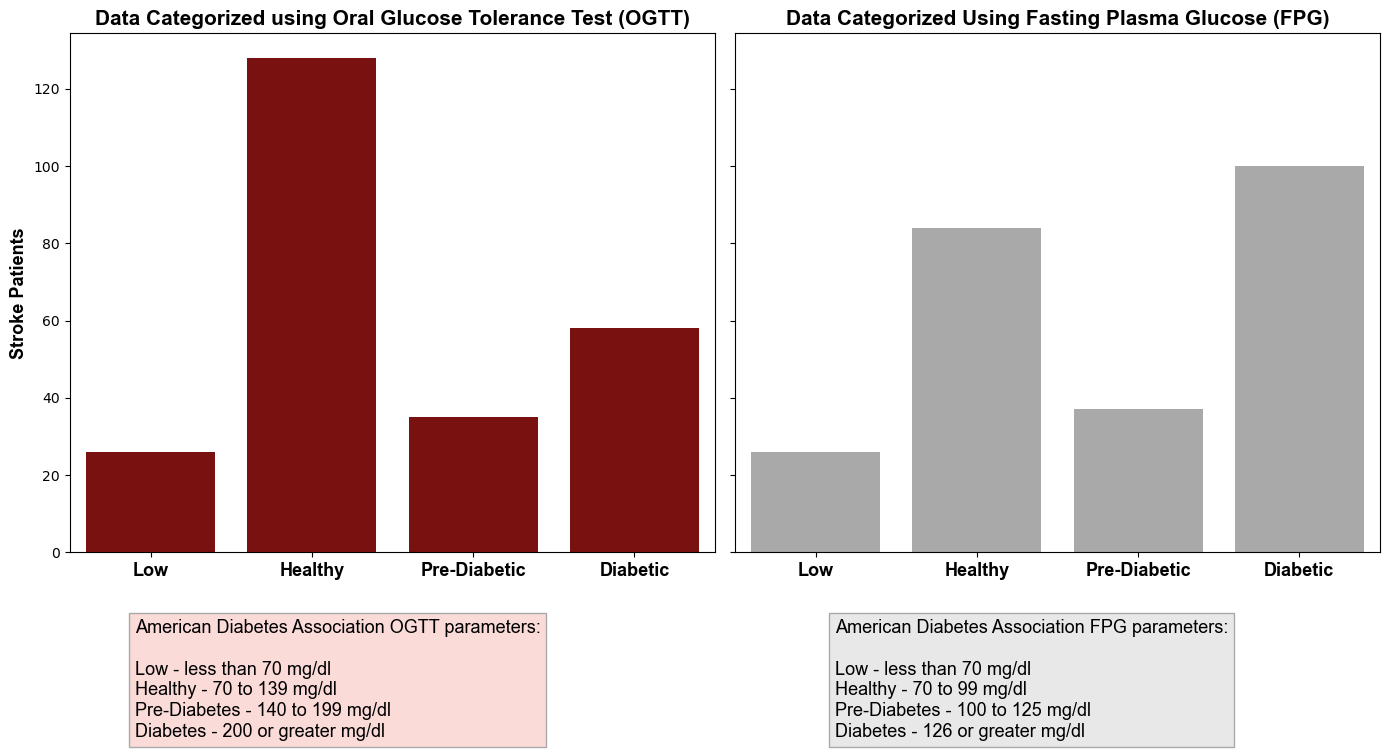

In [3]:
# Create side by side bar count plots to demonstrate the effects 
# of different blood glucose levels on number of patients per glucose level category
# This demonstrates how a lack of context around the Kaggle dataset can impact analysis

#  Define glucose bins
bins1 = [0, 70, 140, 200, float('inf')]   # ADA standard 1 for Oral Glucose Tolerance Test
bins2 = [0, 70, 100, 126, float('inf')]   # ADA standard 2 for Fasting Plasma Glucose

labels4 = ['Low', 'Healthy', 'Pre-Diabetic', 'Diabetic']

# Create glucose category columns
stroke_positive['glucose_category_1'] = pd.cut(
    stroke_positive['avg_glucose_level'],
    bins=bins1,
    labels=labels4,
    right=False
)

stroke_positive['glucose_category_2'] = pd.cut(
    stroke_positive['avg_glucose_level'],
    bins=bins2,
    labels=labels4,
    right=False
)

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)


# ADA Standard 1 Plot
sns.countplot(
    data=stroke_positive,
    x='glucose_category_1',
    order=labels4,
    color='darkred',
    ax=axes[0]
)

axes[0].set_title('Data Categorized using Oral Glucose Tolerance Test (OGTT)',
                  fontsize=15, fontfamily='arial', fontweight='bold')
axes[0].set_xlabel('')
axes[0].set_xticklabels(labels4,
                        fontsize=13,
                        fontfamily='arial',
                        fontweight='bold')
axes[0].set_ylabel('Stroke Patients',
                   fontsize=13,
                   fontfamily='arial',
                   fontweight='bold')


# ADA Standard 2 Plot
sns.countplot(
    data=stroke_positive,
    x='glucose_category_2',
    order=labels4,
    color='darkgrey',
    ax=axes[1]
)

axes[1].set_title('Data Categorized Using Fasting Plasma Glucose (FPG)',
                  fontsize=15, fontfamily='arial', fontweight='bold')
axes[1].set_xlabel('')
axes[1].set_xticklabels(labels4,
                        fontsize=13,
                        fontfamily='arial',
                        fontweight='bold')
axes[1].set_ylabel('')

# Text box under the left plot
fig.text(
    0.10, -0.04,   # x, y relative to figure
    'American Diabetes Association OGTT parameters:\n'
    '\n'
    'Low - less than 70 mg/dl\n'
    'Healthy - 70 to 139 mg/dl\n'
    'Pre-Diabetes - 140 to 199 mg/dl\n'
    'Diabetes - 200 or greater mg/dl',
    fontsize=13,
    fontfamily='arial',
    va='top',
    ha='left',
    bbox=dict(facecolor="#FADBD8", edgecolor='darkgrey')
)

# Text box under the right plot
fig.text(
    0.60, -0.04,   # x, y relative to figure
    'American Diabetes Association FPG parameters:\n'
    '\n'
    'Low - less than 70 mg/dl\n'
    'Healthy - 70 to 99 mg/dl\n'
    'Pre-Diabetes - 100 to 125 mg/dl\n'
    'Diabetes - 126 or greater mg/dl',
    fontsize=13,
    fontfamily='arial',
    va='top',
    ha='left',
    bbox=dict(facecolor="#B7B7B74F", edgecolor='darkgrey')
)

plt.tight_layout()

plt.savefig("../images/Stroke Positive Visualizations/data_issue_example.png",  # File name
            dpi=300,                       # Resolution
            bbox_inches='tight')           # Fit all content on paper


plt.show()
